Let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset with a twist where we test our classifier on high-resolution hand-written digits from outside the dataset.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# Commonly used modules
import numpy as np
import os
import sys

In [3]:
# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

In [4]:
print(tf.__version__)

1.14.0


The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction).

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9.

In [5]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [6]:
# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [7]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

In [8]:
train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first 5 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

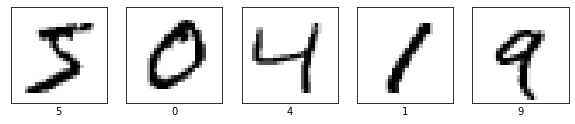

In [9]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Build the model
Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [10]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', \
                 input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function - measures how accurate the model is during training, we want to minimize this with the optimizer.

Optimizer - how the model is updated based on the data it sees and its loss function.

Metrics - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model
Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the train_images and train_labels arrays.

The model learns to associate images and labels.

We ask the model to make predictions about a test set—in this example, the test_images array. 

We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

In [12]:

history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 42s 693us/sample - loss: 0.1957 - acc: 0.9404
Epoch 2/10
60000/60000 [==============================] - 30s 505us/sample - loss: 0.0850 - acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0639 - acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 31s 509us/sample - loss: 0.0534 - acc: 0.9838
Epoch 5/10
60000/60000 [==============================] - 32s 533us/sample - loss: 0.0452 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 33s 548us/sample - loss: 0.0376 - acc: 0.9878 - loss: 0.0376 - acc: 0.
Epoch 7/10
60000/60000 [==============================] - 33s 550us/sample - loss: 0.0330 - acc: 0.9898
Epoch 8/10
60000/60000 [==============================] - 33s 542us/sample - loss: 0.0303 - acc: 0.9904
Epoch 9/10
60000/60000 [==============================] - 33s 544us/sample - loss: 0.0288 - acc: 0.9910
Epoch 10/10
60000/60000 [==============

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [13]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
10000/10000 [==============================] - 4s 396us/sample - loss: 0.0340 - acc: 0.9909
Test accuracy: 0.9909


In [14]:
scores = model.evaluate(test_images, test_labels, verbose=0)

In [15]:
print(scores)

[0.03399121584988028, 0.9909]


In [16]:
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.91%
